Contents:

Information abaut Data

Import Libs and Read Data

Data visualization

Machine learning 

Deployment(Use Flask)




Information about Data:

Dataset Name : Groceries dataset

Dataset Columns :

Member_number

Date

itemDescription

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
%matplotlib inline

In [ ]:
%pip install apyori


  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=d18a25c8f7b8da68398dfa3574e7622cac4b1caeb1cd66c9cf95e7d6b719a792
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import itertools
from datetime import datetime
import io
from google.colab import files
uploaded = files.upload()

Saving Groceries_dataset.csv to Groceries_dataset.csv


In [ ]:
data=pd.read_csv(io.StringIO(uploaded['Groceries_dataset.csv'].decode('utf-8')))

In [ ]:
des=data.head()
cm=sns.light_palette('b',as_cmap=True)
s=des.style.background_gradient(cmap=cm)
s

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
data.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
data.Date = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['No_day'] = data['Date'].dt.dayofweek

In [ ]:
z=data.head()
cm=sns.light_palette('Y',as_cmap=True)
s=z.style.background_gradient(cmap=cm)
s

/usr/local/lib/python3.7/dist-packages/seaborn/palettes.py:467: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return mpl.colors.to_rgb(color)


,Member_number,Date,itemDescription,year,month,day,No_day
0,1808,2015-07-21 00:00:00,tropical fruit,2015,7,21,1
1,2552,2015-05-01 00:00:00,whole milk,2015,5,1,4
2,2300,2015-09-19 00:00:00,pip fruit,2015,9,19,5
3,1187,2015-12-12 00:00:00,other vegetables,2015,12,12,5
4,3037,2015-01-02 00:00:00,whole milk,2015,1,2,4


In [ ]:
df_year = data.groupby('year')
df_year['itemDescription'].agg(['count'])

,count
year,
2014,18277
2015,20488


highest & Least Sellers

Text(0.5, 1.0, 'highest Sellers')

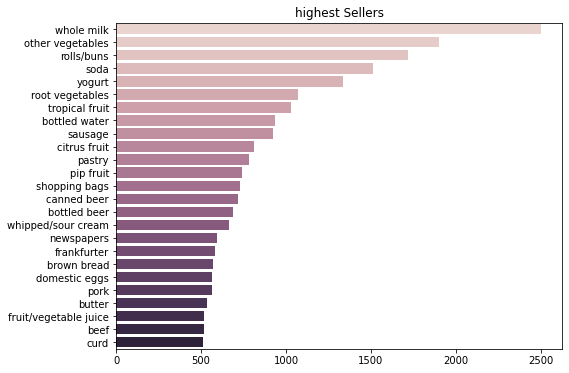

In [ ]:
x=list(data['itemDescription'].value_counts()[:25].values)
y=list(data['itemDescription'].value_counts()[:25].index)
plt.figure(figsize=(8,6))
ax=sns.barplot(x=x,y=y,palette=sns.cubehelix_palette(len(x)))
plt.title('highest Sellers')

Text(0.5, 1.0, 'Least Sellers')

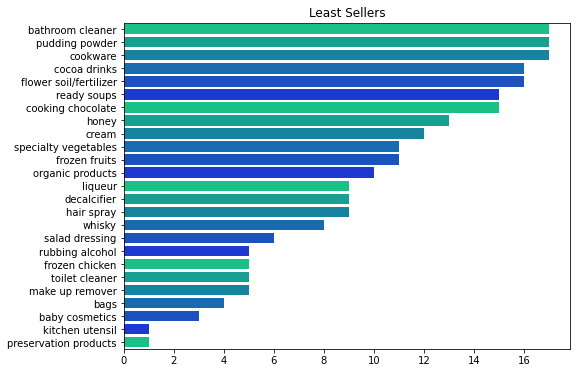

In [ ]:
x = list(data['itemDescription'].value_counts()[-25:].values)
y = list(data['itemDescription'].value_counts()[-25:].index)

plt.figure(figsize=(8,6))
ax=sns.barplot(x=x,y=y, palette=sns.color_palette("winter_r"))
plt.title('Least Sellers')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


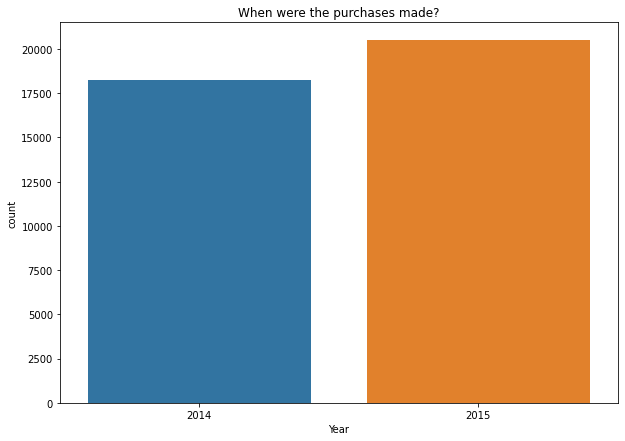

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
plt.figure(figsize=(10,7))
sns.countplot(data['Date'].apply(lambda x: x.year))
plt.title('When were the purchases made?')
plt.xlabel('Year')
plt.show()

In [ ]:
df_year2014 = data[data['year']==2014]
df_year2015 = data[data['year']==2015]

Text(0.5, 1.0, 'highest Sellers(2014)')

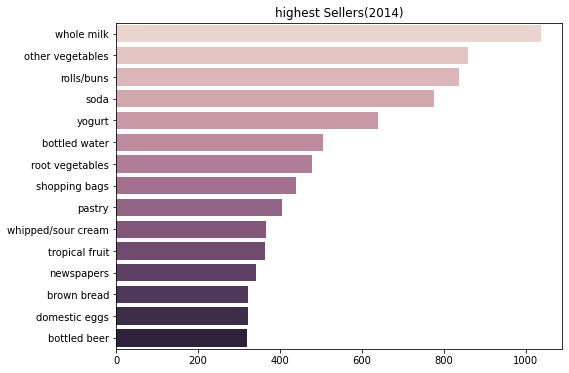

In [ ]:
x = list(df_year2014['itemDescription'].value_counts()[:15].index)
y = list(df_year2014['itemDescription'].value_counts()[:15].values)

plt.figure(figsize=(8,6))
ax=sns.barplot(x=y,y=x, palette=sns.cubehelix_palette(len(x)))
plt.title('highest Sellers(2014)')

Text(0.5, 1.0, 'Least  Sellers(2014)')

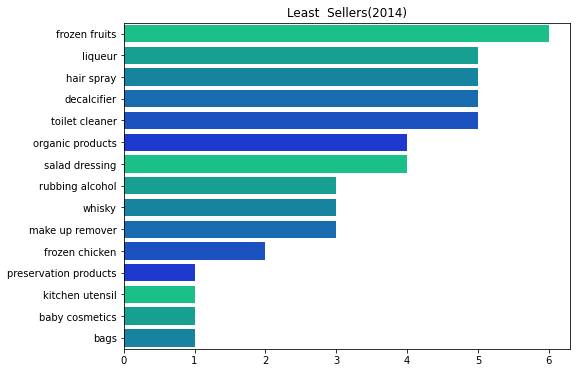

In [ ]:
x = list(df_year2014['itemDescription'].value_counts()[-15:].index)
y = list(df_year2014['itemDescription'].value_counts()[-15:].values)

plt.figure(figsize=(8,6))
ax=sns.barplot(x=y,y=x,palette=sns.color_palette("winter_r"))
plt.title('Least  Sellers(2014)')

Text(0.5, 1.0, 'Best Sellers(2015)')

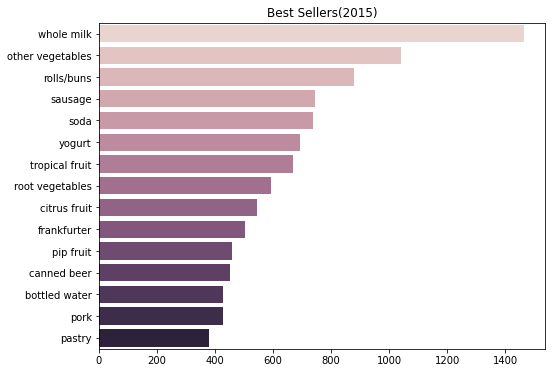

In [ ]:
x = list(df_year2015['itemDescription'].value_counts()[:15].index)
y = list(df_year2015['itemDescription'].value_counts()[:15].values)

plt.figure(figsize=(8,6))
ax=sns.barplot(x=y,y=x, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers(2015)')

Text(0.5, 1.0, 'Least Sellers(2015)')

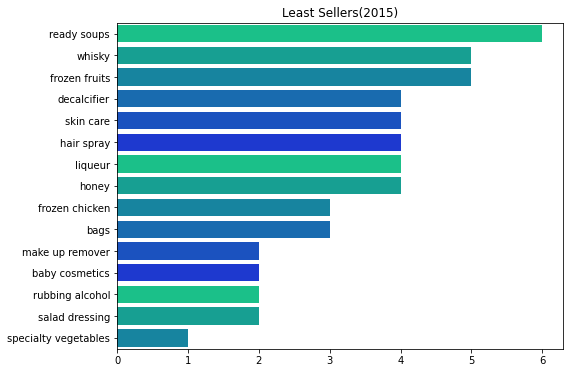

In [ ]:

x = list(df_year2015['itemDescription'].value_counts()[-15:].index)
y = list(df_year2015['itemDescription'].value_counts()[-15:].values)

plt.figure(figsize=(8,6))
ax=sns.barplot(x=y,y=x, palette=sns.color_palette("winter_r"))
plt.title('Least Sellers(2015)')

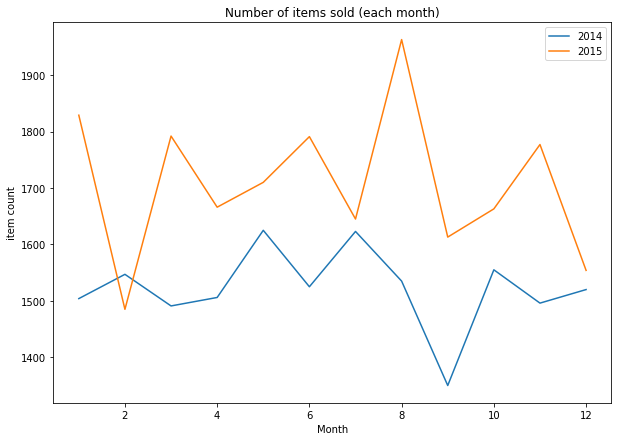

In [ ]:
df3 = data.copy()
df3['Year'] = data['Date'].apply(lambda x: x.year)
df3['Month'] = data['Date'].apply(lambda x: x.month)
df3.drop(['Member_number','Date'],axis=1,inplace=True)
df3 = df3.groupby(['Year','Month']).count().reset_index()



d_2014 = df3[df3['Year'] == 2014]
d_2015 = df3[df3['Year'] == 2015]


plt.figure(figsize=(10,7))
plt.plot(d_2014['Month'],d_2014['itemDescription'],label='2014')
plt.plot(d_2015['Month'],d_2015['itemDescription'],label='2015')
plt.title('Number of items sold (each month)')
plt.xlabel('Month')
plt.ylabel('item count')
plt.legend()
plt.show()

In [ ]:
df1 = data.groupby('itemDescription').count().sort_values(by='Member_number',ascending=False).reset_index()
df1.rename(columns={'itemDescription': 'Item',
                   'Member_number': 'Number of sales'},inplace=True)
df1.drop(['Date','year','month','day','No_day'],axis=1,inplace=True)
df1

,Item,Number of sales
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
...,...,...
162,rubbing alcohol,5
163,bags,4
164,baby cosmetics,3
165,preservation products,1


In [ ]:
df_final=data.groupby('itemDescription').count().sort_values(by='Member_number',ascending=False).reset_index()

df_final.drop(['Date'],axis=1,inplace=True)
df_final

,itemDescription,Member_number,year,month,day,No_day
0,whole milk,2502,2502,2502,2502,2502
1,other vegetables,1898,1898,1898,1898,1898
2,rolls/buns,1716,1716,1716,1716,1716
3,soda,1514,1514,1514,1514,1514
4,yogurt,1334,1334,1334,1334,1334
...,...,...,...,...,...,...
162,rubbing alcohol,5,5,5,5,5
163,bags,4,4,4,4,4
164,baby cosmetics,3,3,3,3,3
165,preservation products,1,1,1,1,1


In [ ]:
import plotly.express as px
df1 = data.groupby('itemDescription').count().sort_values(by='Member_number',ascending=False).head(10).reset_index()
#df1.drop(['Date'],axis=1,inplace=True)
df1.rename(columns={'itemDescription': 'Item',
                   'Member_number' : 'Number of sales'},inplace=True)
fig = px.bar(df1,
             x='Item',
             y='Number of sales',
             title= 'Most purchased items')
fig.show()

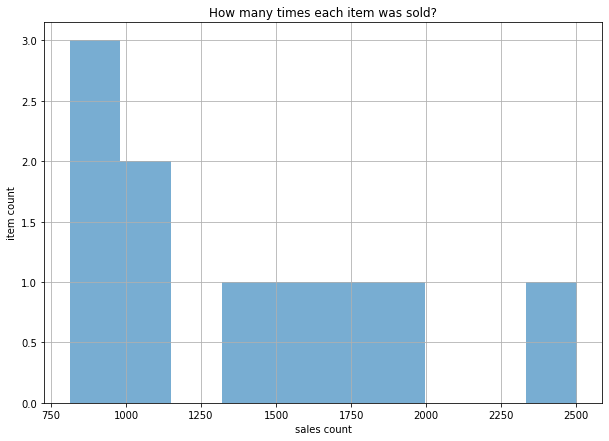

In [ ]:
plt.figure(figsize=(10,7))
df1['Number of sales'].hist(alpha=0.6)
plt.xlabel('sales count')
plt.ylabel('item count')
plt.title("How many times each item was sold?")
plt.show()

In [ ]:
df=data.copy()

In [ ]:
class StudyRules:
    def __init__(self, df):
        self.association_rules_dict = {}  # holds final output
        self.data_df = df  # read data table into dataframe
        self.association_rules = []  # holds output from Apriori algo
        self.trans_matrix = pd.DataFrame()
        self.df_corr = pd.DataFrame()
        self.user_recs_df = pd.DataFrame(columns={'Member_number', 'Recommended'})
        self.rules_df = pd.DataFrame(columns={'items_base', 'items_add'})

    def compute_rules(self):
        # association rules
        apriori_data = self.data_df.groupby(['Member_number','Date'], sort=False)['itemDescription'].apply(list).tolist()
        self.association_rules = apriori(apriori_data, min_support=0.001, min_confidence=0.01, min_lift=1,
                                         max_length=None)
        
        # collaborative filtering
        self.trans_matrix = self.data_df.groupby(['Member_number','itemDescription'])['itemDescription'].count().reset_index(name ='Count')
        self.trans_matrix = self.trans_matrix.pivot_table(index = 'Member_number', columns = 'itemDescription', values = 'Count', aggfunc = 'sum').fillna(0)
        self.trans_matrix = self.trans_matrix.applymap(lambda x: 1 if x > 0 else 0)
        cor_matrix = self.trans_matrix.T.corr()
        cor_matrix.index = cor_matrix.index.copy()
        cor_matrix.columns.name = 'col'
        # calculate the correlation matrix and reshape
        self.df_corr = cor_matrix.stack().reset_index()
        # rename the columns
        self.df_corr.columns = ['to_user', 'from_user', 'corr']

    def get_user_recommendations(self):
        for user in set(list(self.df_corr['to_user'])):
            related_user = self.df_corr[self.df_corr['to_user'] == user].sort_values(by='corr',ascending=False)['from_user'].values[1]
            to_rec = self.trans_matrix.columns[self.trans_matrix.loc[user] == 1]
            from_rec = self.trans_matrix.columns[self.trans_matrix.loc[related_user] == 1]
            recommended = from_rec[np.isin(from_rec, to_rec, invert=True)]
            if len(recommended) > 0:
                for item in recommended:
                    self.user_recs_df = self.user_recs_df.append({'Member_number': user, 'Recommended': item}, ignore_index=True)
        
    def extract_rules(self):
        for item in self.association_rules:
            # first index of the inner list
            # Contains base item and add item

            if len(item[0]) < 2:
                continue

            for k in item[2]:

                base_item_list = list(k[0])
                # if base item set is empty then go to the next record.
                if not base_item_list:
                    continue

                # sort the base_item_list before adding it as a key to the AssociationRules dictionary
                base_item_list.sort()
                base_item_list_key = ','.join([str(x) for x in base_item_list])

                if base_item_list_key not in self.association_rules_dict.keys():
                    self.association_rules_dict[base_item_list_key] = []

                self.association_rules_dict[base_item_list_key].append((list(k[1]), k[3]))

                # if something goes wrong, then use the following print block to print values
                # print("CONFIG")
                # print("Base item: ", base_item_list_key)
                # print("Target item: ", list(k[1]))
                # print("Confidence: " + str(k[2]))
                # print("Lift: " + str(k[3]))

        # sort the rules in descending order of lift values.
        for ruleList in self.association_rules_dict:
            self.association_rules_dict[ruleList].sort(key=lambda x: x[1], reverse=True)
            
    def get_rules_df(self):
        for key, value in self.association_rules_dict.items():
            items_add = list(itertools.chain.from_iterable([x[0] for x in value]))
            items_add_str = ','.join([str(x) for x in items_add])
            self.rules_df = self.rules_df.append({'items_base':key, 'items_add':items_add_str}, ignore_index=True)

    def update_rules(self):
        self.compute_rules()
        self.extract_rules()
        self.get_rules_df()
        self.get_user_recommendations()

In [ ]:
class Recommender:

    def recommend_to_basket(self, items):
        items.sort()
        items_base = ','.join([str(x) for x in items])
        items_add = rules.rules_df[rules.rules_df['items_base'] == 'tropical fruit']['items_add'].values[0].split(',')
        return items_add
        
    def recommend_to_user(self, id):
        items = list(rules.user_recs_df[rules.user_recs_df.Member_number == 5000].Recommended.values)
        return items

In [ ]:
rules = StudyRules(df)


In [ ]:
rules.update_rules()


In [ ]:
rules.user_recs_df.head()

,Recommended,Member_number
0,chocolate,1000
1,other vegetables,1000
2,bottled water,1002
3,fruit/vegetable juice,1004
4,margarine,1006


In [ ]:
rules.rules_df.head()

,items_base,items_add
0,UHT-milk,tropical fruit
1,tropical fruit,"flour,cat food,specialty chocolate,UHT-milk"
2,beef,"frozen vegetables,margarine,newspapers,brown b..."
3,brown bread,"canned beer,beef,pork,white bread,frankfurter,..."
4,citrus fruit,"specialty chocolate,candy,napkins,frozen veget..."


Get Recommendations

In [ ]:
recommender = Recommender()

In [ ]:
recommender.recommend_to_basket(['tropical fruit'])

['flour', 'cat food', 'specialty chocolate', 'UHT-milk']

In [ ]:
#  get user recommendations
recommender.recommend_to_user(5000)

['bottled water',
 'brown bread',
 'butter milk',
 'long life bakery product',
 'margarine',
 'pot plants']

**Deployment(Use Flask)**

https://groceries-recommendations.herokuapp.com/